In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit import Model

[[Model]]
    Model(ran_sev)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 6
    # variables        = 2
    chi-square         = 4.9760e-09
    reduced chi-square = 1.2440e-09
    Akaike info crit   = -121.462351
    Bayesian info crit = -121.878832
    R-squared          = 0.99234871
[[Variables]]
    D:  2.6131e-10 +/- 2.2945e-11 (8.78%) (init = 1e-10)
    a: -1.2797e-04 +/- 2.6271e-05 (20.53%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(D, a) = -0.836
[[Model]]
    Model(ran_sev)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 6
    # variables        = 2
    chi-square         = 1.1498e-08
    reduced chi-square = 2.8744e-09
    Akaike info crit   = -116.437370
    Bayesian info crit = -116.853851
    R-squared          = 0.98508135
[[Variables]]
    D:  3.0738e-10 +/- 3.7828e-11 (12.31%) (init = 1e-10)
    a: -1.5352e-04 +/- 3.9933e-05 (26

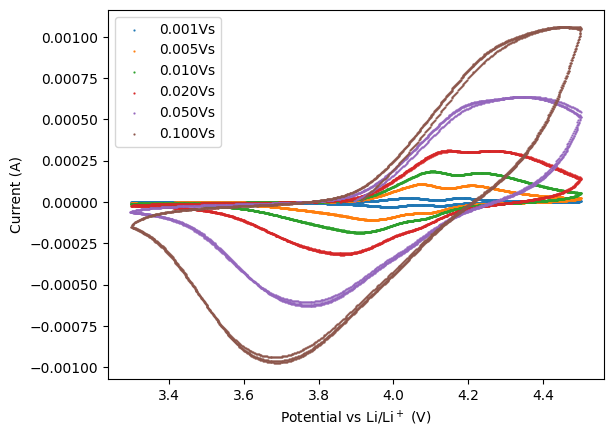

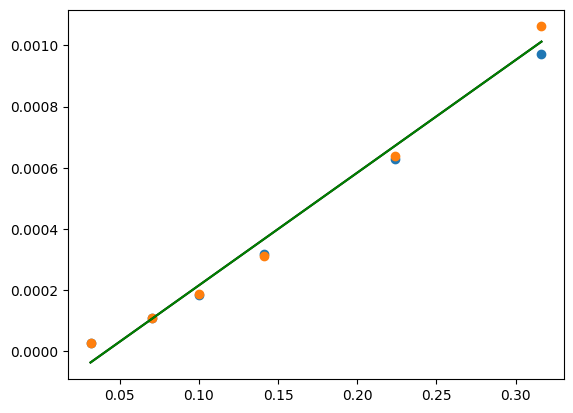

In [22]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\PLSA Pt\01\ScanRate'
files = [os.path.join(path, i) for i in os.listdir(path)]
col = ['Potential vs Li/Li$^+$ (V)', 'Current (A)', 'Charge (C)', 'Time (s)']
col2 = ['Current Peak (A)', 'Scan Rate (V/s)']
area = 0.785#7.85e-5 # m2
F = 96485.3321 # C / mol
R = 8.31446261815324 # J /(K * mol)
T = 300 #K
N = 1
C = 1e-3
def ran_sev(v, D, a): # C
    # return 2.69e5 * area * C * np.sqrt(D * v)
    return 0.4463 * N * F * area * C * ((N * F * v * D) / (R * T))**0.5 + a

i_p_c = pd.DataFrame(columns = col2)
i_p_a = pd.DataFrame(columns = col2)

n = 0
for i in files:    
    df = pd.read_csv(i, sep = ';', names = col, skiprows=1)
    current_peak_c = -min(df[col[1]])
    current_peak_a = max(df[col[1]])
    i_p_c.loc[n] = (current_peak_c, float(i[-13:-8]))
    i_p_a.loc[n] = (current_peak_a, float(i[-13:-8])) 
    n += 1 
    sns.scatterplot(data = df, x = col[0], y = col[1], edgecolor = None, s = 2, label = i[-13:-6])
    
gmodel = Model(ran_sev)
params = gmodel.make_params()
params['D'].set(value = 1e-10, min = 1e-12, max = 1e-8)
# params['C'].set(value = 1e-4, min = 1e-5, max = 1e-3)
params['a'].set(value = 1)

result = gmodel.fit(i_p_c[col2[0]], params, v = i_p_c[col2[1]])
result_a = gmodel.fit(i_p_a[col2[0]], params, v = i_p_a[col2[1]])
print(result.fit_report())
print(result_a.fit_report())
# print(i_p_c)
# print(i_p_a)

# PLOT
# sns.scatterplot(data = df, x = col[0], y = col[1], edgecolor = None, s = 2, label = files[n][-13:-6])

# plt.scatter(3.94, -0.000107)
# plt.scatter(3.97, -0.000051)
# plt.scatter(3.99, -0.000028)




fig, ax = plt.subplots()
plt.scatter(np.sqrt(i_p_c[col2[1]]), i_p_c[col2[0]])
plt.scatter(np.sqrt(i_p_a[col2[1]]), i_p_a[col2[0]])

plt.plot(np.sqrt(i_p_a[col2[1]]), result_a.best_fit, c = 'k')
plt.plot(np.sqrt(i_p_a[col2[1]]), result_a.best_fit, c = 'g')

In [3]:

a = 0.4463 * F 
print(a)

43061.40371623
